In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")
data= pd.read_csv('Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [5]:
#Checking the null values and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# The mean sales generated by each zone.


In [6]:
data.mean()


Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

The mean can be found from the describe function.

The mean sales generated by Zone A=1540493.138.

The mean sales generated by Zone B=1755559.586.

The mean sales generated by Zone C=1772871.034.

The mean sales generated by Zone D=1842926.759.

Text(0, 0.5, 'Sales')

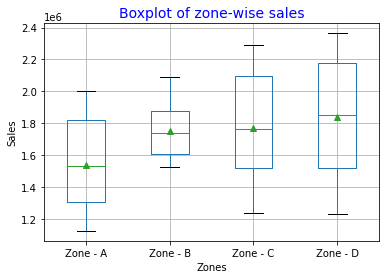

In [7]:
ax= data.boxplot(showmeans= True)
ax.set_title('Boxplot of zone-wise sales', fontsize=14, color= 'blue')
plt.xlabel('Zones')
plt.ylabel('Sales')


# Total sales generated by all the zones for each month.


In [15]:
data["Total_Sales"]=data.sum(axis=1)
data1=data
data1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,14045088
1,Month - 2,1238428,1707421,2212113,1994341,14304606
2,Month - 3,1860771,2091194,1282374,1241600,12951878
3,Month - 4,1871571,1759617,2290580,2252681,16348898
4,Month - 5,1244922,1606010,1818334,1326062,11990656
5,Month - 6,1534390,1573128,1751825,2292044,14302774
6,Month - 7,1820196,1992031,1786826,1688055,14574216
7,Month - 8,1625696,1665534,2161754,2363315,15632598
8,Month - 9,1652644,1873402,1755290,1422059,13406790
9,Month - 10,1852450,1913059,1754314,1608387,14256420


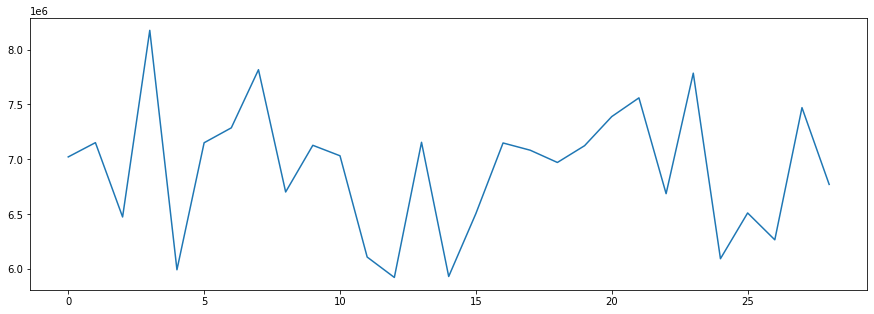

In [9]:
plt.figure(figsize=(15,5))
plt.plot(data["Total_Sales"], scalex=True, scaley=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Month - 1'),
  Text(1, 0, 'Month - 2'),
  Text(2, 0, 'Month - 3'),
  Text(3, 0, 'Month - 4'),
  Text(4, 0, 'Month - 5'),
  Text(5, 0, 'Month - 6'),
  Text(6, 0, 'Month - 7'),
  Text(7, 0, 'Month - 8'),
  Text(8, 0, 'Month - 9'),
  Text(9, 0, 'Month - 10'),
  Text(10, 0, 'Month - 11'),
  Text(11, 0, 'Month - 12'),
  Text(12, 0, 'Month - 13'),
  Text(13, 0, 'Month - 14'),
  Text(14, 0, 'Month - 15'),
  Text(15, 0, 'Month - 16'),
  Text(16, 0, 'Month - 17'),
  Text(17, 0, 'Month - 18'),
  Text(18, 0, 'Month - 19'),
  Text(19, 0, 'Month - 20'),
  Text(20, 0, 'Month - 21'),
  Text(21, 0, 'Month - 22'),
  Text(22, 0, 'Month - 23'),
  Text(23, 0, 'Month - 24'),
  Text(24, 0, 'Month - 25'),
  Text(25, 0, 'Month - 26'),
  Text(26, 0, 'Month - 27'),
  Text(27, 0, 'Month - 28'),
  Text(28, 0, 'Month - 29')])

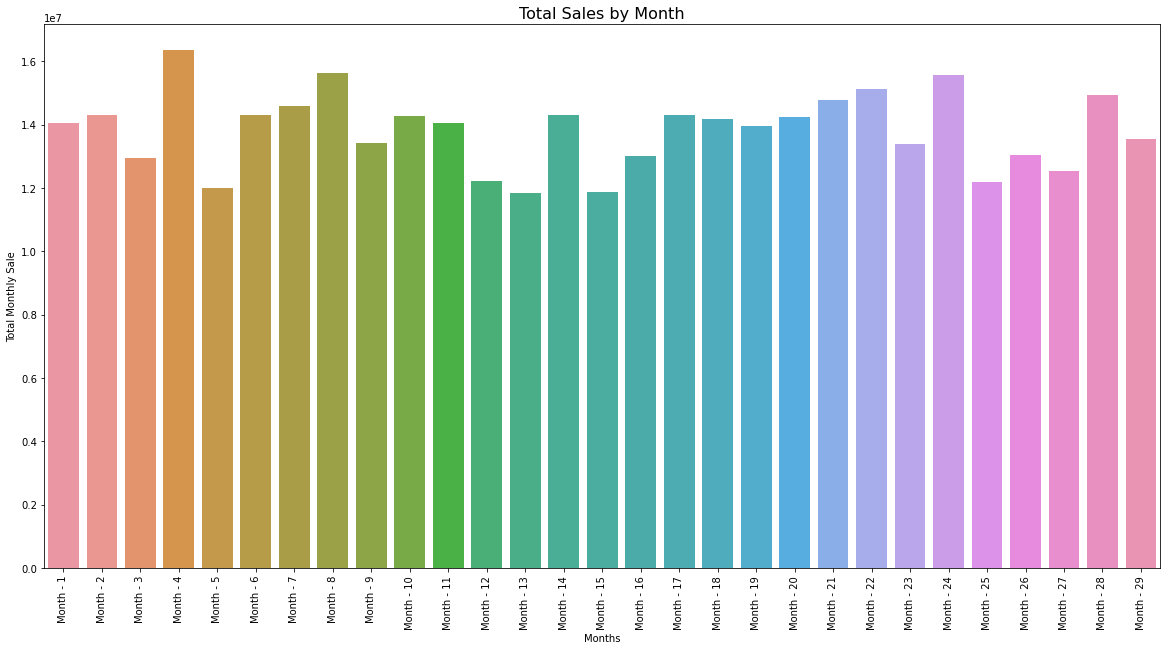

In [20]:
plt.figure(figsize=(20,10))
x=data1['Month']
y=data1["Total_Sales"]
sns.barplot(data=data1 ,x="Month", y="Total_Sales")
plt.title("Total Sales by Month", fontsize = 16)
plt.xlabel("Months", fontsize=10)
plt.ylabel("Total Monthly Sale", fontsize = 10)
plt.xticks(rotation = 90)



# Check whether all the zones generate the same amount of sales.


Null Hypothesis,H0: All the zones generate the same amount of sales.

Alternate Hypothesis,H1: Atleast one the zone generate different amount of sales.

In [21]:
F_value, p_val = stats.f_oneway(data['Zone - A'], data['Zone - B'],data['Zone - C'], data['Zone - D'])
print("F value =",F_value,"\np value=",p_val)
alpha = 0.05
if p_val >= alpha:
    print("Failed to reject the null hypothesis based on the sample.\nTherefore, Same amount of Sales in all zones.")
else:
    print("Failed to accept the null hypothesis based on the sample.\nTherefore, Different amounts of sales in all zones.")

F value = 5.672056106843581 
p value= 0.0011827601694503335
Failed to accept the null hypothesis based on the sample.
Therefore, Different amounts of sales in all zones.
